1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import math

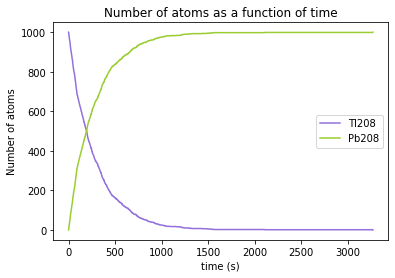

In [40]:
t_step = 1 
tau = 3.052*60 #in seconds

def p(t): #CDF distribution
    return(1-2**(-t/tau))

Ti_n=[1000]
count=0

while Ti_n[count]>0 : #cicle until no Tl atoms are present
    n_rand = np.random.uniform(size=Ti_n[count])  
    n_decayed = sum(n_rand<p(1))        #decide if the atom has decayed 
    Ti_n.append(Ti_n[count]-n_decayed)
    count+=1
    
plt.plot(range(0,count+1),Ti_n, color="mediumpurple", label="Tl208" )
plt.plot(range(0,count+1), 1000-np.array(Ti_n), color="yellowgreen", label="Pb208" )
plt.ylabel('Number of atoms')
plt.xlabel('time (s)')
plt.title('Number of atoms as a function of time')
plt.legend()
plt.show()

The cdf distribution is $p(t)=1-2^{-t/\tau}$, and its inverse is $t=-\tau \frac{log(1-y)}{log(2)}$

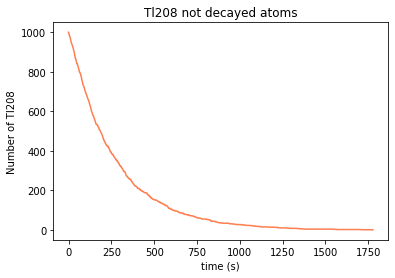

In [33]:
y_rand = np.random.uniform(size=1000)   #random numbers uniform distribution
t_decay = -tau*np.log(1-y_rand)/np.log(2)  #times from inverse of cdf

times = np.arange(0,round(max(t_decay))+2)
n_tl = [sum(t_decay>t) for t in times]     #counts the non decayed atoms 

plt.plot(times,n_tl, color="coral" )
plt.ylabel('Number of Tl208')
plt.xlabel('time (s)')
plt.title('Tl208 not decayed atoms')
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

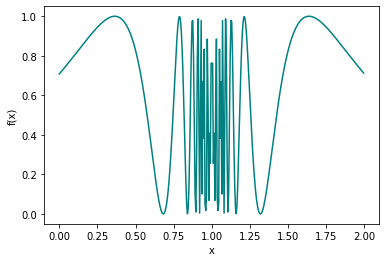

In [2]:
def f(x):
    return(np.sin(1/(1-x))**2)

x_range = np.arange(0,2,0.005)
x_range = x_range[x_range!=1]

plt.plot(x_range, f(x_range), color="teal" )
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

In [3]:
N_sampling =10000
N_integrals =1000

integrals=np.zeros(N_integrals)

for i in range(0,N_integrals):
    x_rand = np.random.uniform(0, 2, N_sampling)
    y_rand = np.random.uniform(0, 1, N_sampling)
    n_acc = np.sum(y_rand<f(x_rand))
    integrals[i] = 1*2*n_acc/N_sampling

print("Integral = %.3f + %.3f" % (np.mean(integrals),np.std(integrals))) 


Integral = 1.347 + 0.009


In [4]:
x_values = np.random.uniform(0, 2, N_sampling)
i = np.sum(f(x_values))*2/N_sampling    #integral calculation
sigma = np.std(f(x_values))/np.sqrt(N_sampling)

print("Integral = %.3f + %.3f" % (i,sigma)) 


Integral = 1.351 + 0.003


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [16]:
N_sampling =50000

x_rand = np.random.uniform(-1, 1, N_sampling)
y_rand = np.random.uniform(-1, 1, N_sampling)

i = sum( (x_rand**2+y_rand**2)<=1)*4/N_sampling   #accept/reject method

print("Area circle = %.3f"% i )
print("Analitic calculation = %.3f" % (math.pi*1**2))

Area circle = 3.137
Analitic calculation = 3.142


In [45]:
dim = 10
N_sampling =50000

points = np.array([np.random.uniform(-1, 1, N_sampling) for i in range(0,dim)])  #generalization to nD using arrays
squared = np.sum(points**2,axis=0)

i = sum(squared<=1)*2**dim/N_sampling

print("%u-dimensional volume = %.6f"%(dim,i))
print("Analitic calculation = %.3f" % (math.pi**5/120))

10-dimensional volume = 2.437120
Analitic calculation = 2.550


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

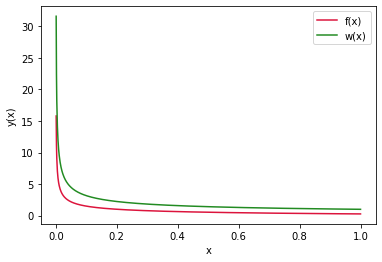

In [16]:
def f(x):
    return(1/(np.sqrt(x)*(np.exp(x)+1)))

def w(x): 
    return(1/np.sqrt(x))

N_sampling=1000

x_range = np.linspace(0,1,N_sampling)[1:]
plt.plot(x_range, f(x_range), color="crimson", label="f(x)")
plt.plot(x_range, w(x_range), color="forestgreen", label="w(x)")

plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend()
plt.show()

$w_{pdf}= \frac{1}{2\sqrt(x)}$ and $w_{cdf}= x^{1/2}$. So the inverse of the cdf brings to $x=y^{2}$.

In [20]:
N_sampling = 10000
x_rand = np.random.uniform(0, 1, N_sampling)**2 #random points accordingly to w pdf

i = np.sum(f(x_rand)/w(x_rand))/N_sampling *2
 
print("Integral = %.5f"%i)
print("Wolfram calculation = 0.83893")

Integral = 0.83745
Wolfram calculation = 0.83893
